In [2]:
# importing all modules that you will need to analysis and visualize your data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Reading the csv file
df = pd.read_csv('listings.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5456,Guesthouse in Austin · ★4.84 · 1 bedroom · 2 b...,8028,Sylvia,NaN,78702,30.26057,-97.73441,Entire home/apt,126,2,657,2023-08-27,3.72,1,306,42,NaN
1,5769,Home in Austin · ★4.90 · 1 bedroom · 1 bed · 1...,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,45,1,290,2023-08-04,1.77,1,0,21,NaN
2,6413,Guesthouse in Austin · ★4.97 · Studio · 1 bed ...,13879,Todd,NaN,78704,30.24885,-97.73587,Entire home/apt,57,30,122,2022-10-17,0.73,1,0,3,NaN
3,6448,Guesthouse in Austin · ★4.97 · 1 bedroom · 2 b...,14156,Amy,NaN,78704,30.26034,-97.76487,Entire home/apt,159,3,305,2023-09-04,2.09,1,156,17,NaN
4,8502,Guest suite in Austin · ★4.56 · 1 bedroom · 1 ...,25298,Karen,NaN,78741,30.23466,-97.73682,Entire home/apt,48,4,51,2023-05-16,0.31,1,98,3,NaN


In [4]:
df['neighbourhood_group'].isnull().sum()

14861

In [5]:
# drop all columns that have only null values
all_values = df.columns.to_list()
for col in all_values:
    if df[col].isnull().sum() == len(df):
        df.drop(columns=col, inplace=True)
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,5456,Guesthouse in Austin · ★4.84 · 1 bedroom · 2 b...,8028,Sylvia,78702,30.26057,-97.73441,Entire home/apt,126,2,657,2023-08-27,3.72,1,306,42
1,5769,Home in Austin · ★4.90 · 1 bedroom · 1 bed · 1...,8186,Elizabeth,78729,30.45697,-97.78422,Private room,45,1,290,2023-08-04,1.77,1,0,21
2,6413,Guesthouse in Austin · ★4.97 · Studio · 1 bed ...,13879,Todd,78704,30.24885,-97.73587,Entire home/apt,57,30,122,2022-10-17,0.73,1,0,3
3,6448,Guesthouse in Austin · ★4.97 · 1 bedroom · 2 b...,14156,Amy,78704,30.26034,-97.76487,Entire home/apt,159,3,305,2023-09-04,2.09,1,156,17
4,8502,Guest suite in Austin · ★4.56 · 1 bedroom · 1 ...,25298,Karen,78741,30.23466,-97.73682,Entire home/apt,48,4,51,2023-05-16,0.31,1,98,3


In [6]:
# gett the number of null values in the rest of data
null_values = df.isnull().sum()
null_values

id                                   0
name                                 0
host_id                              0
host_name                            2
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       3103
reviews_per_month                 3103
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [7]:
# if number of null values less than 5% we will drop them
five_per = len(df)*0.05
col_to_drop = df.columns[df.isnull().sum() < five_per]
df.dropna(subset=col_to_drop, inplace=True)
print(df.isnull().sum())

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       3103
reviews_per_month                 3103
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64


In [11]:
# if the number of null values larger than 5% we will impute them by mode
inputed_col = df.columns[df.isnull().sum() > 0]
df[['last_review', 'reviews_per_month']]


,last_review,reviews_per_month
0,2023-08-27,3.72
1,2023-08-04,1.77
2,2022-10-17,0.73
3,2023-09-04,2.09
4,2023-05-16,0.31
...,...,...
14856,NaN,NaN
14857,NaN,NaN
14858,NaN,NaN
14859,NaN,NaN


<Axes: xlabel='reviews_per_month', ylabel='Count'>

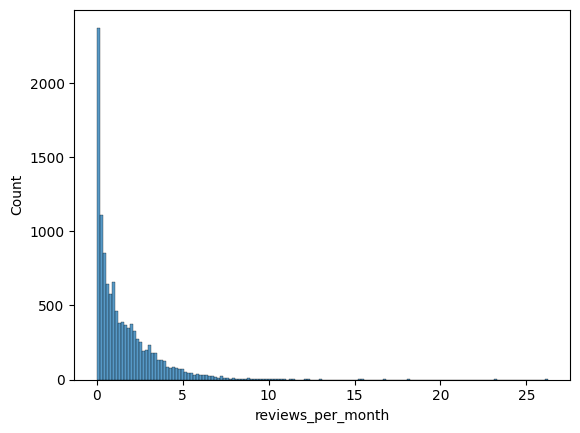

In [18]:
sns.histplot(data=df, x="reviews_per_month",)

In [20]:
# because there is skwed in reviews_per_month the best avg is the median
df['reviews_per_month'].fillna(df['reviews_per_month'].median(), inplace=True)

<Axes: xlabel='reviews_per_month', ylabel='Count'>

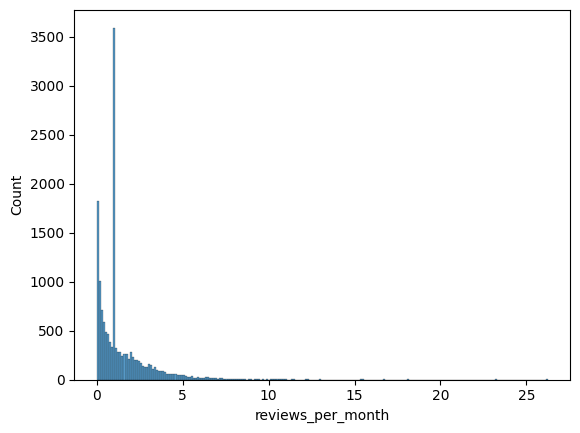

In [24]:
missing_values = df.isnull().sum()
missing_values
sns.histplot(data=df, x="reviews_per_month",)


In [34]:
# to get rid of the nall values in last_reivew its inputed by the mode
df['last_review'].fillna(df['last_review'].mode()[0], inplace=True)

In [41]:
dupicated_values = df.duplicated().sum()
dupicated_values
# there are no duplicated values in this data set now we are done from EDA

0

In [43]:
# so we are ready to visualize our data 
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,5456,Guesthouse in Austin · ★4.84 · 1 bedroom · 2 b...,8028,Sylvia,78702,30.26057,-97.73441,Entire home/apt,126,2,657,2023-08-27,3.72,1,306,42
1,5769,Home in Austin · ★4.90 · 1 bedroom · 1 bed · 1...,8186,Elizabeth,78729,30.45697,-97.78422,Private room,45,1,290,2023-08-04,1.77,1,0,21
2,6413,Guesthouse in Austin · ★4.97 · Studio · 1 bed ...,13879,Todd,78704,30.24885,-97.73587,Entire home/apt,57,30,122,2022-10-17,0.73,1,0,3
3,6448,Guesthouse in Austin · ★4.97 · 1 bedroom · 2 b...,14156,Amy,78704,30.26034,-97.76487,Entire home/apt,159,3,305,2023-09-04,2.09,1,156,17
4,8502,Guest suite in Austin · ★4.56 · 1 bedroom · 1 ...,25298,Karen,78741,30.23466,-97.73682,Entire home/apt,48,4,51,2023-05-16,0.31,1,98,3


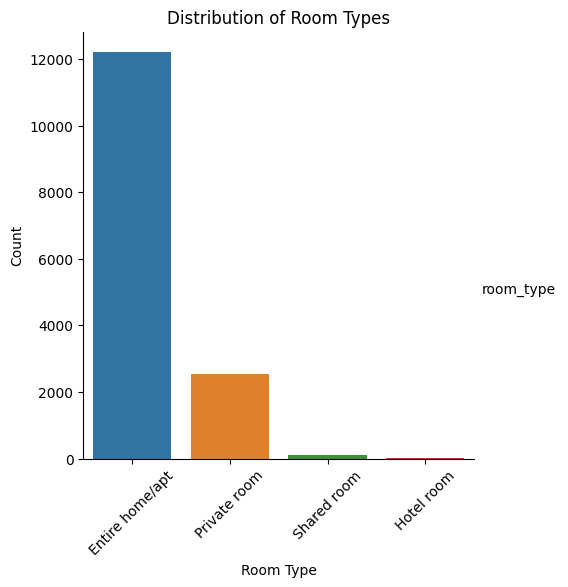

In [83]:
# the number of rooms
rooms = df['room_type'].value_counts().reset_index()
sns.catplot(kind='bar', data=rooms, x='room_type', y='count', hue='room_type')
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
# the most rent unite is Entire room

<Axes: xlabel='price', ylabel='reviews_per_month'>

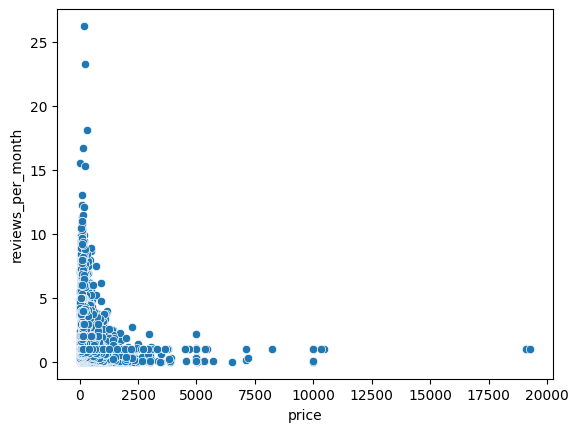

In [69]:
# get the scatter plot between the price and reviews per months
sns.scatterplot(data=df, x='price', y='reviews_per_month')

<Axes: >

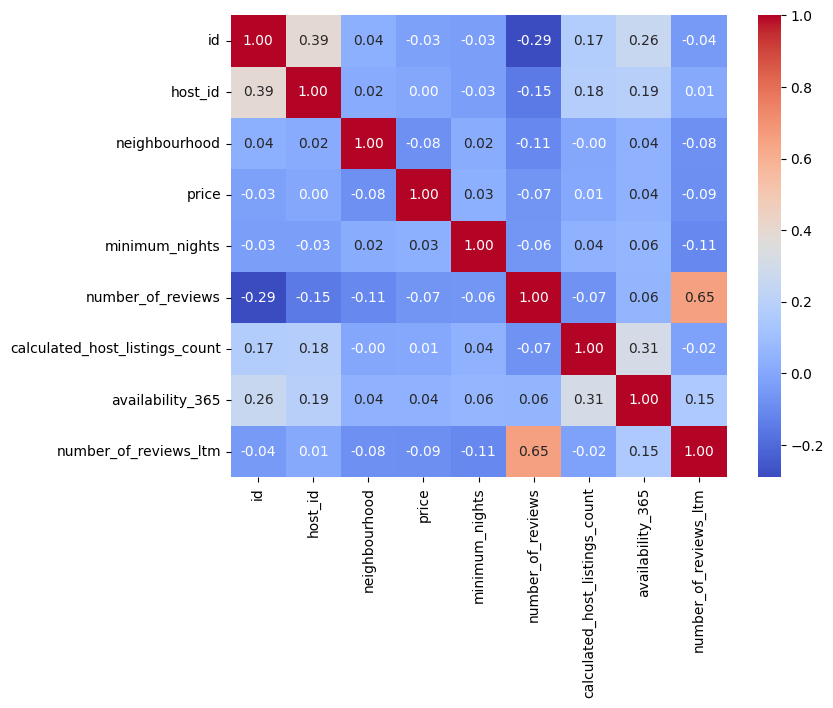

In [71]:
new_df = df.select_dtypes('int')
correlation_matrix = new_df.corr()
plt.figure(figsize=(8, 6))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

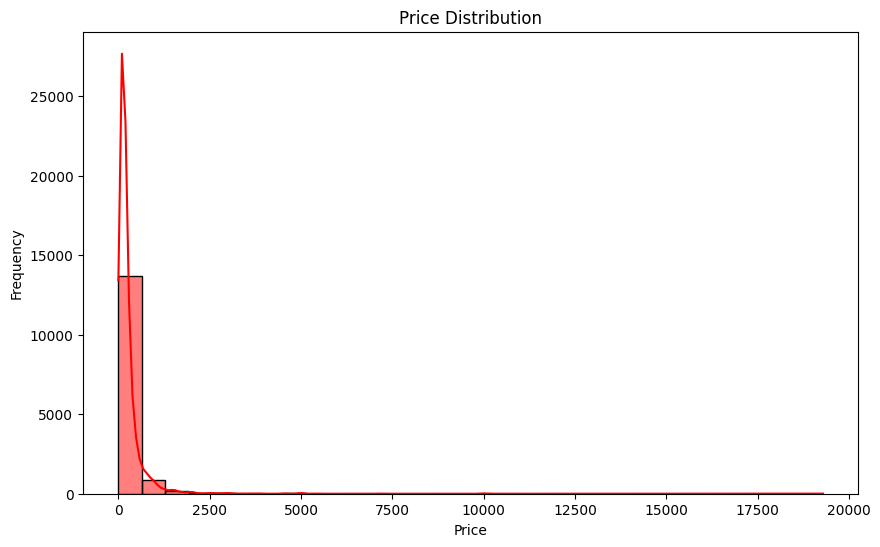

In [81]:
# get the distibution of the data 
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True, color='Red')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

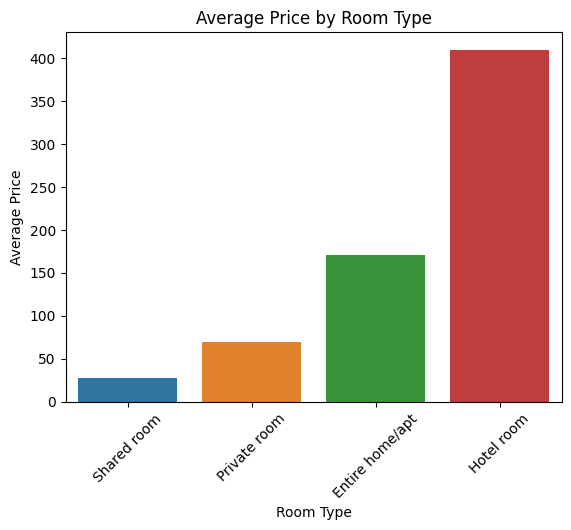

In [82]:
# get the avarage price to each type of room
avarage_room_type = df.groupby('room_type').agg({'price':'median'}).reset_index().sort_values(by='price')
sns.barplot(data= avarage_room_type, x='room_type', y='price', hue='room_type')
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()